In [1]:
import requests
import json
import pandas
import datetime
from pandas import HDFStore
import matplotlib.pyplot as plt

In [2]:
Exchange_Info_API = 'https://api.binance.com/api/v3/exchangeInfo'
Price_Info_API = 'https://api.binance.com/api/v3/klines'

In [3]:
def symbols_info():
    data = json.loads(requests.get(Exchange_Info_API).text)
    cols = ['symbol','status','baseAsset','quoteAsset']
    data = [[i[j] for j in cols] for  i in data['symbols']]
    return pandas.DataFrame(data,columns=cols) 

In [7]:
def Date_to_timestamp(_time,_format = '%d/%m/%Y %H:%M:%S'):
    return int(datetime.datetime.timestamp(datetime.datetime.strptime(_time,_format ))*1000)

In [8]:
def Price_info(symbol,step='1m',start=None,end=None,limit=500, base = '',quote='') :

    if start != None and type(start) == str:
        start = Date_to_timestamp(start)
    if end != None and type(end) == str:
        end = Date_to_timestamp(end)
    

    par = {
        'symbol':symbol,
        'startTime':start,
        'endTime':end,
        'interval':step,
        'limit':limit}


    cols =[
        'Kline open time',   #if a range of time
        'Open price',       #First trade price in the time range
        'High price',       #max buy in time
        'Low price',        #Min sell in time
        'Close price',      #Last trade price in the time range
        'Volume',           #Sum in time
        'Kline Close time',
        'Quote asset volume',   #Sum in time
        'Number of trades',     #Sum in time
        'Taker buy base asset volume',  #Sum in time
        'Taker buy quote asset volume', #Sum in time
        'Unused field, ignore'] # not use 
    p=pandas.DataFrame(json.loads(requests.get(Price_Info_API,params=par).text),columns=cols)
    p.insert(0,'quote', quote)
    p.insert(0,'base', base)
    p.insert(0,'Symbol', symbol)

    # base/quote = price
    return p

-------------------

In [6]:
symbols = symbols_info()

In [7]:
data = pandas.concat(
    [Price_info(
        i['symbol'],
        '30m',
        '21/10/2022 00:00:00',
        '10/11/2022 00:00:00',
        1000,
        i['baseAsset'],
        i['quoteAsset']
        ) for _,i in symbols[symbols['status']=='TRADING'].iterrows()
    ],
    ignore_index=True)

KeyboardInterrupt: 

In [61]:
data

,Symbol,base,quote,Kline open time,Open price,High price,Low price,Close price,Volume,Kline Close time,Quote asset volume,Number of trades,Taker buy base asset volume,Taker buy quote asset volume,"Unused field, ignore"
0,ETHBTC,ETH,BTC,1666285200000,0.06727900,0.06728400,0.06713700,0.06726100,1678.27060000,1666286999999,112.81479874,3360,599.98040000,40.32979955,0
1,ETHBTC,ETH,BTC,1666287000000,0.06726100,0.06732000,0.06724600,0.06727800,1671.44470000,1666288799999,112.47082167,3039,640.25320000,43.08404508,0
2,ETHBTC,ETH,BTC,1666288800000,0.06727800,0.06743800,0.06718200,0.06743700,2441.54230000,1666290599999,164.26715006,4622,1094.13180000,73.62494828,0
3,ETHBTC,ETH,BTC,1666290600000,0.06743700,0.06761200,0.06743700,0.06761200,1789.04260000,1666292399999,120.85124398,4405,988.24110000,66.75865608,0
4,ETHBTC,ETH,BTC,1666292400000,0.06761100,0.06762100,0.06745200,0.06751100,1212.35940000,1666294199999,81.86182297,2816,520.46620000,35.14032281,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1387693,HFTUSDT,HFT,USDT,1668006000000,0.62480000,0.63790000,0.61110000,0.61330000,931642.00000000,1668007799999,583553.93953000,2295,414927.30000000,260149.78643000,0
1387694,HFTUSDT,HFT,USDT,1668007800000,0.61450000,0.62000000,0.56430000,0.57170000,2464439.60000000,1668009599999,1434603.32395000,4564,1219866.30000000,710327.10684000,0
1387695,HFTUSDT,HFT,USDT,1668009600000,0.57100000,0.58900000,0.54700000,0.55560000,1464321.10000000,1668011399999,832308.56927000,3407,624211.00000000,354941.04038000,0
1387696,HFTUSDT,HFT,USDT,1668011400000,0.55450000,0.59800000,0.55200000,0.57330000,1353333.60000000,1668013199999,783057.56581000,3379,574310.90000000,332213.45400000,0


In [62]:
hdf= pandas.HDFStore('Saved_Data','w')
hdf.put('data',data)
hdf.close()

In [10]:
a = pandas.HDFStore('Saved_Data','r')
df = a.get('data')
a.close()
df

,Symbol,base,quote,Kline open time,Open price,High price,Low price,Close price,Volume,Kline Close time,Quote asset volume,Number of trades,Taker buy base asset volume,Taker buy quote asset volume,"Unused field, ignore"
0,ETHBTC,ETH,BTC,1666285200000,0.06727900,0.06728400,0.06713700,0.06726100,1678.27060000,1666286999999,112.81479874,3360,599.98040000,40.32979955,0
1,ETHBTC,ETH,BTC,1666287000000,0.06726100,0.06732000,0.06724600,0.06727800,1671.44470000,1666288799999,112.47082167,3039,640.25320000,43.08404508,0
2,ETHBTC,ETH,BTC,1666288800000,0.06727800,0.06743800,0.06718200,0.06743700,2441.54230000,1666290599999,164.26715006,4622,1094.13180000,73.62494828,0
3,ETHBTC,ETH,BTC,1666290600000,0.06743700,0.06761200,0.06743700,0.06761200,1789.04260000,1666292399999,120.85124398,4405,988.24110000,66.75865608,0
4,ETHBTC,ETH,BTC,1666292400000,0.06761100,0.06762100,0.06745200,0.06751100,1212.35940000,1666294199999,81.86182297,2816,520.46620000,35.14032281,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1387693,HFTUSDT,HFT,USDT,1668006000000,0.62480000,0.63790000,0.61110000,0.61330000,931642.00000000,1668007799999,583553.93953000,2295,414927.30000000,260149.78643000,0
1387694,HFTUSDT,HFT,USDT,1668007800000,0.61450000,0.62000000,0.56430000,0.57170000,2464439.60000000,1668009599999,1434603.32395000,4564,1219866.30000000,710327.10684000,0
1387695,HFTUSDT,HFT,USDT,1668009600000,0.57100000,0.58900000,0.54700000,0.55560000,1464321.10000000,1668011399999,832308.56927000,3407,624211.00000000,354941.04038000,0
1387696,HFTUSDT,HFT,USDT,1668011400000,0.55450000,0.59800000,0.55200000,0.57330000,1353333.60000000,1668013199999,783057.56581000,3379,574310.90000000,332213.45400000,0


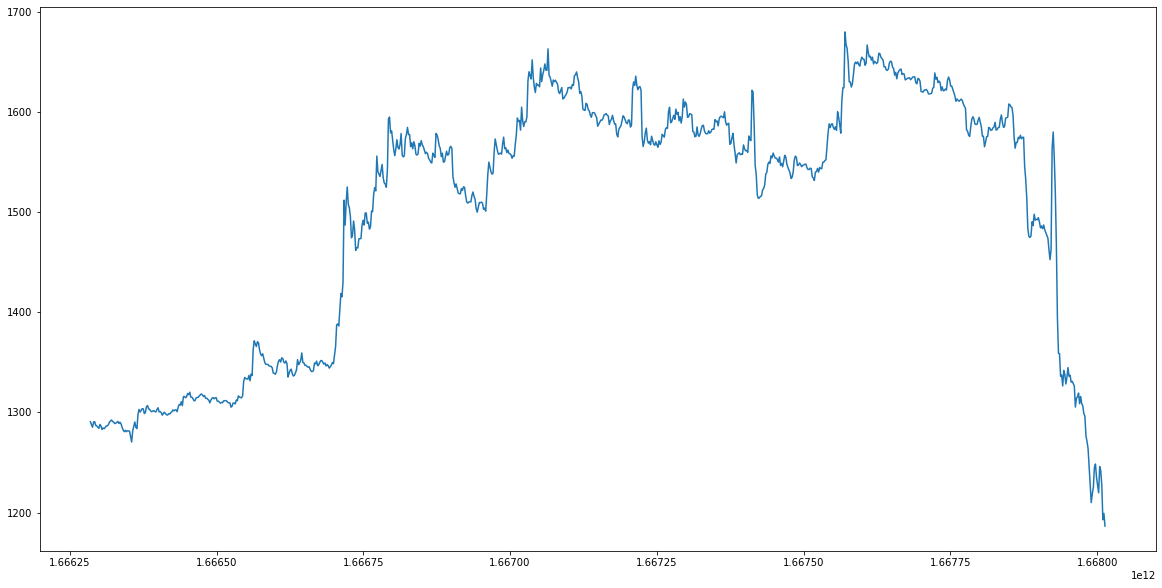

In [11]:
plt.figure(figsize=(20,10))
plt.plot(df[df['Symbol'] == 'ETHUSDT']['Kline open time'],pandas.to_numeric(df[df['Symbol'] == 'ETHUSDT']['High price']))

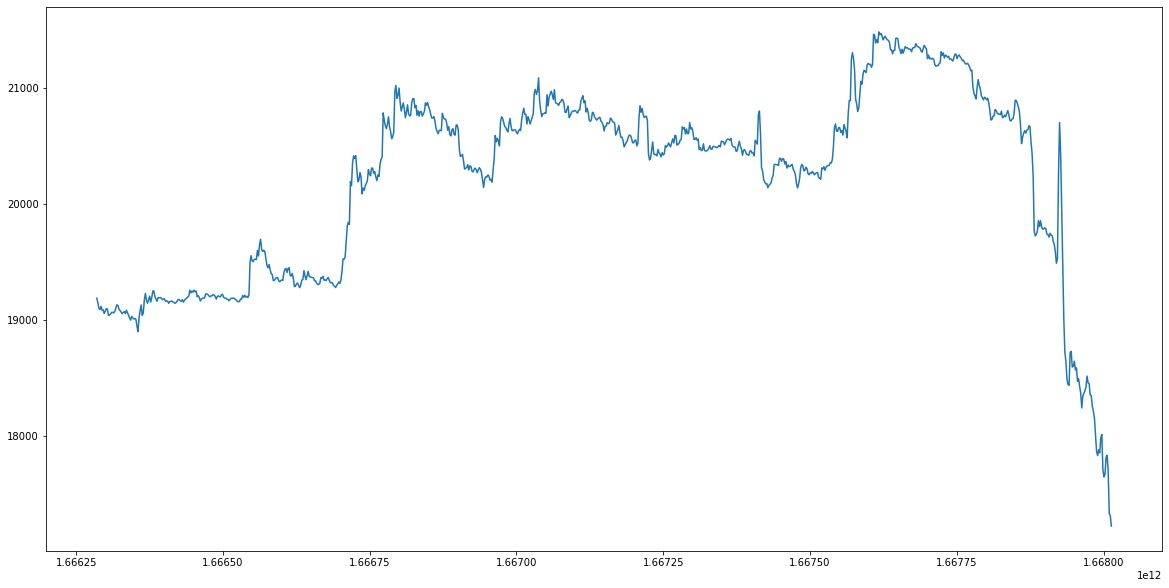

In [12]:
plt.figure(figsize=(20,10))
plt.plot(df[df['Symbol'] == 'BTCUSDT']['Kline open time'],pandas.to_numeric(df[df['Symbol'] == 'BTCUSDT']['High price']))

I wanna know what if there are any symbols that have same base and quote but swap each other

In [13]:
_2way = []

for i in list(symbols['baseAsset'] + symbols['quoteAsset']) :
    if i in list(symbols['quoteAsset'] + symbols['baseAsset']):
        _2way += [i]

In [14]:
symbols [ [True if i in _2way else False for i in symbols['symbol'] ]]

,symbol,status,baseAsset,quoteAsset
312,BTCTUSD,BREAK,BTC,TUSD
313,TUSDBTC,BREAK,TUSD,BTC
314,ETHTUSD,BREAK,ETH,TUSD
315,TUSDETH,BREAK,TUSD,ETH
316,TUSDBNB,BREAK,TUSD,BNB
390,PAXBTC,BREAK,PAX,BTC
391,PAXBNB,BREAK,PAX,BNB
393,PAXETH,BREAK,PAX,ETH
397,USDCBNB,BREAK,USDC,BNB
404,BNBPAX,BREAK,BNB,PAX


it got but most of them is BREAK, that mean it could not be trade anymore or stop one of way

In [67]:
# How many trade there is in a BREAK symbol with among 100 nearest day
pandas.concat(
    [Price_info(
        i['symbol'],'1d',limit=100
        ) for _,i in symbols[symbols['status']=='BREAK'].iterrows()
    ],
    ignore_index=True)

# it took a long time to run, but te data is not continous clearly, so we don't want these data

,Symbol,base,quote,Kline open time,Open price,High price,Low price,Close price,Volume,Kline Close time,Quote asset volume,Number of trades,Taker buy base asset volume,Taker buy quote asset volume,"Unused field, ignore"
0,BCCBTC,,,1533772800000,0.09369400,0.09495800,0.09230000,0.09309600,8196.83000000,1533859199999,767.15967393,15356,4204.40900000,393.48928530,0
1,BCCBTC,,,1533859200000,0.09309400,0.09376000,0.09199300,0.09286500,16390.72200000,1533945599999,1519.94269845,17708,10091.71300000,935.90065028,0
2,BCCBTC,,,1533945600000,0.09284500,0.09286100,0.08900000,0.09021500,26718.51300000,1534031999999,2407.40467812,23551,14466.71200000,1303.92162449,0
3,BCCBTC,,,1534032000000,0.09021500,0.09183300,0.08968900,0.09040200,23130.38600000,1534118399999,2098.29947842,17086,14300.03100000,1297.35250330,0
4,BCCBTC,,,1534118400000,0.09047400,0.09107600,0.08399400,0.08496400,29824.06300000,1534204799999,2642.43292287,26454,17095.21100000,1516.34858024,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64293,BTCUST,,,1652054400000,34285.01000000,39897.50000000,31500.00000000,39801.80000000,2075.49261000,1652140799999,69478925.66195060,31707,642.04403000,21587954.56033100,0
64294,BTCUST,,,1652140800000,39829.27000000,49999.00000000,33826.13000000,38830.90000000,3983.02494000,1652227199999,148708755.78046920,108802,1898.18430000,71221839.22187950,0
64295,BTCUST,,,1652227200000,38820.24000000,137999.98000000,36220.50000000,38309.00000000,5358.90681000,1652313599999,325438610.25676350,191510,2475.42540000,154127151.89859740,0
64296,BTCUST,,,1652313600000,38266.50000000,111121.00000000,37662.64000000,79903.01000000,2178.66313000,1652399999999,127670003.12709330,164890,1066.63099000,65115157.59803480,0


USDT, BUSD, BTC is mostly can trade to other coin so we get 3 coin is the base of market

In [201]:
symbols_get = symbols[symbols['status'] == 'TRADING']

In [202]:
symbols_get

,symbol,status,baseAsset,quoteAsset
0,ETHBTC,TRADING,ETH,BTC
1,LTCBTC,TRADING,LTC,BTC
2,BNBBTC,TRADING,BNB,BTC
3,NEOBTC,TRADING,NEO,BTC
4,QTUMETH,TRADING,QTUM,ETH
...,...,...,...,...
2118,OSMOUSDT,TRADING,OSMO,USDT
2119,OSMOBUSD,TRADING,OSMO,BUSD
2120,HFTBTC,TRADING,HFT,BTC
2121,HFTBUSD,TRADING,HFT,BUSD


In [21]:
pandas.concat(
    [pandas.to_numeric(df[df['Symbol'] == 'ETHUSDT']['High price']).reset_index(drop=True),
    pandas.to_numeric(df[df['Symbol'] == 'BTCUSDT']['High price']).reset_index(drop=True)],
    ignore_index=True,
    keys = ['ETH','BTC'],axis=1).corr(method='kendall')[0][1]

#over 80% of changed price ETH is as same as BTC
#why high price ??? because this is the highest price we can sell, most importane to recive profit

0.8156539161877354

In [ ]:
other =  pandas.concat([df[df['Symbol']==i][['Kline open time','High price']].set_index('Kline open time') for i in symbols_get['symbol']],axis = 1)
other.columns = list(symbols_get['symbol'])
other = other.fillna(0)
other = other.astype(float)

In [129]:
other.corr()

,ETHBTC,LTCBTC,BNBBTC,NEOBTC,QTUMETH,EOSETH,SNTETH,BNTETH,GASBTC,BNBETH,...,APTEUR,APTTRY,APTBRL,QKCBUSD,OSMOBTC,OSMOUSDT,OSMOBUSD,HFTBTC,HFTBUSD,HFTUSDT
ETHBTC,1.000000,0.301956,0.499994,0.124588,-0.931672,-0.926708,-0.960333,-0.686603,-0.113371,-0.154040,...,-0.174200,-0.177932,0.793342,0.773277,0.752981,0.771916,0.771833,0.009937,0.022042,0.021751
LTCBTC,0.301956,1.000000,0.806322,-0.046697,-0.304854,-0.332222,-0.408109,0.173178,0.106351,0.691765,...,-0.585522,-0.588487,0.442599,0.507447,0.535417,0.530865,0.530292,0.410942,0.302726,0.178282
BNBBTC,0.499994,0.806322,1.000000,-0.208045,-0.544168,-0.496901,-0.586775,0.053939,0.142561,0.776112,...,-0.723366,-0.734732,0.719801,0.764343,0.799973,0.785982,0.785486,0.367513,0.251359,0.130907
NEOBTC,0.124588,-0.046697,-0.208045,1.000000,0.158271,0.006384,0.012417,-0.131935,0.412200,-0.349730,...,0.638941,0.630707,-0.063990,-0.086361,-0.128550,-0.093353,-0.093388,-0.243626,-0.155511,-0.076669
QTUMETH,-0.931672,-0.304854,-0.544168,0.158271,1.000000,0.935282,0.955720,0.676660,0.178398,0.044829,...,0.352240,0.347794,-0.742424,-0.733656,-0.734064,-0.736927,-0.736878,-0.103307,-0.078640,-0.047470
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
OSMOUSDT,0.771916,0.530865,0.785982,-0.093353,-0.736927,-0.736012,-0.797694,-0.214808,-0.017436,0.337175,...,-0.560413,-0.572887,0.980921,0.987580,0.998059,1.000000,0.999988,0.182782,0.134670,0.078685
OSMOBUSD,0.771833,0.530292,0.785486,-0.093388,-0.736878,-0.735888,-0.797554,-0.214804,-0.017643,0.336661,...,-0.560171,-0.572636,0.980708,0.987337,0.998071,0.999988,1.000000,0.182494,0.134361,0.078376
HFTBTC,0.009937,0.410942,0.367513,-0.243626,-0.103307,-0.102766,-0.086346,0.260116,0.033353,0.422182,...,-0.475871,-0.462565,0.121459,0.171516,0.206869,0.182782,0.182494,1.000000,0.947748,0.815122
HFTBUSD,0.022042,0.302726,0.251359,-0.155511,-0.078640,-0.086120,-0.069762,0.169911,0.024365,0.276102,...,-0.321474,-0.311949,0.092921,0.127419,0.149238,0.134670,0.134361,0.947748,1.000000,0.956886


C:\Users\TNT\AppData\Local\Temp\ipykernel_9792\3711477633.py:23: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


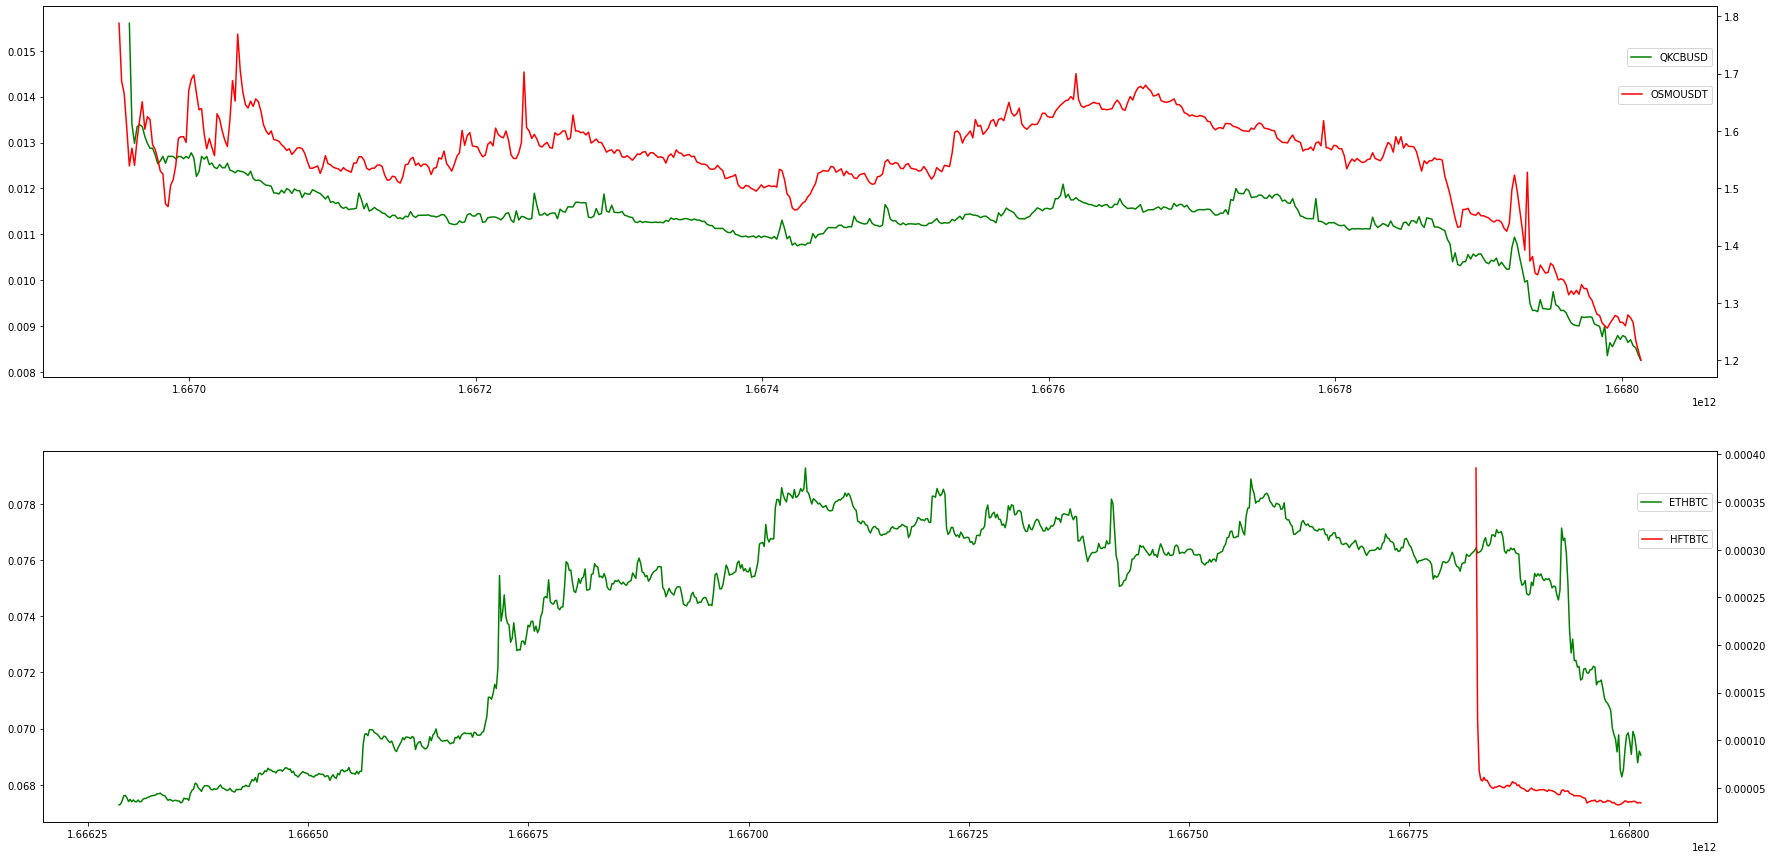

In [188]:
fig, axs = plt.subplots(2)

fig.set_size_inches(30,15)

### look same ( both increase/decrease at the same time or one increase and one decease ) for all time

axs[0].plot(df[df['Symbol'] == 'QKCBUSD']['Kline open time'],pandas.to_numeric(df[df['Symbol'] == 'QKCBUSD']['High price']),color='g',label = 'QKCBUSD')
temp = axs[0].twinx()
temp.plot(df[df['Symbol'] == 'OSMOUSDT']['Kline open time'],pandas.to_numeric(df[df['Symbol'] == 'OSMOUSDT']['High price']),color='r',label = 'OSMOUSDT')
axs[0].legend(bbox_to_anchor =(0.5,0,0.5, 0.9))
temp.legend(bbox_to_anchor =(0.5,0,0.5, 0.8))

### look difference ( sometime both increase/ decrease and some time one increase and one decrease )

axs[1].plot(df[df['Symbol'] == 'ETHBTC']['Kline open time'],pandas.to_numeric(df[df['Symbol'] == 'ETHBTC']['High price']),color='g',label = 'ETHBTC')
temp = axs[1].twinx()
temp.plot(df[df['Symbol'] == 'HFTBTC']['Kline open time'],pandas.to_numeric(df[df['Symbol'] == 'HFTBTC']['High price']),color='r',label = 'HFTBTC')

axs[1].legend(bbox_to_anchor =(0.5,0,0.5, 0.9))
temp.legend(bbox_to_anchor =(0.5,0,0.5, 0.8))


fig.show()

In [195]:
def plot_2(data,symbol1,symbol2):
    fig = plt.figure(figsize=(30,10))
    ax1 = fig.add_subplot()
    ax1.plot(data[data['Symbol'] == symbol1]['Kline open time'],pandas.to_numeric(data[data['Symbol'] == symbol1]['High price']),color='g',label = symbol1)
    temp = ax1.twinx()
    temp.plot(data[data['Symbol'] == symbol2]['Kline open time'],pandas.to_numeric(data[data['Symbol'] == symbol2]['High price']),color='r',label = symbol2)
    ax1.legend(bbox_to_anchor =(0.5,0,0.5, 0.9))
    temp.legend(bbox_to_anchor =(0.5,0,0.5, 0.8))

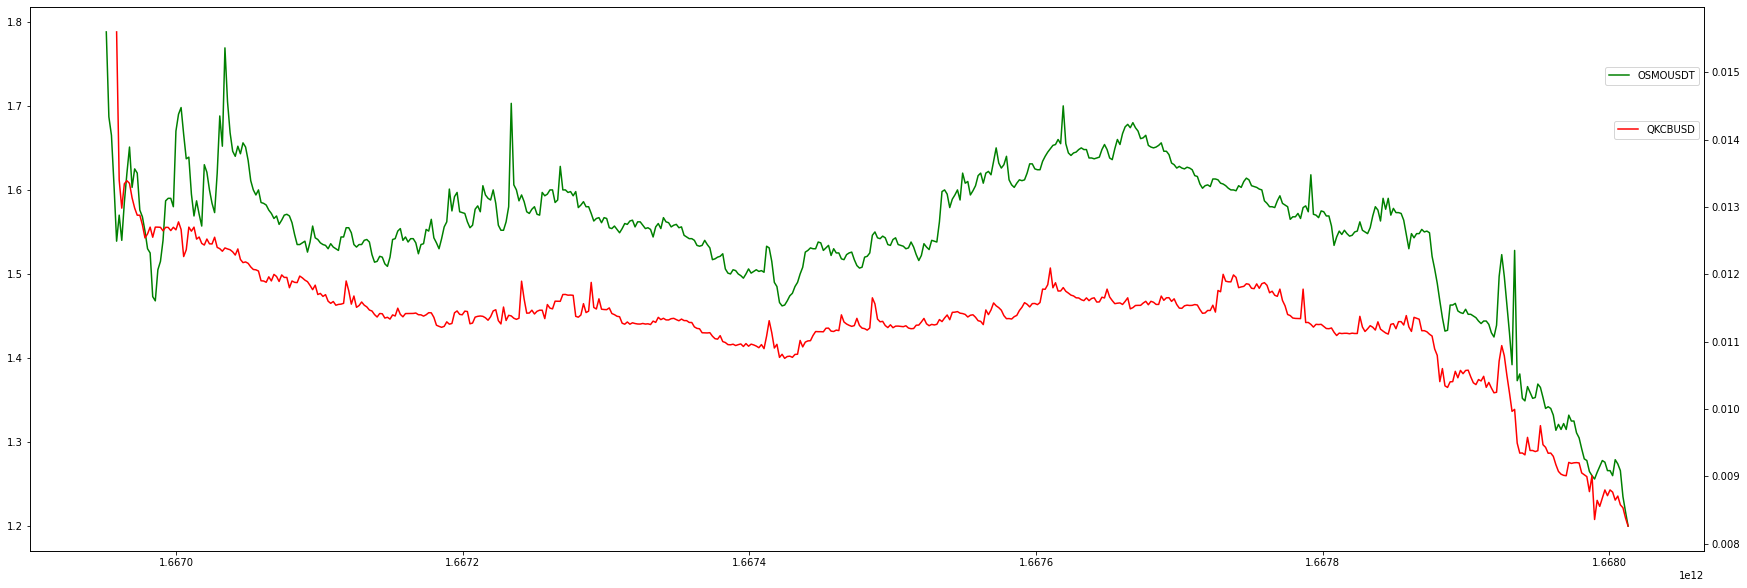

In [198]:
plot_2(df,'OSMOUSDT','QKCBUSD')